# Image Enhancement Using Transformation

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/my-drive')

Mounted at /content/my-drive


In [ ]:
def plot_img(image, edited, title1, title2, cmap_val='gray'):
    
    fig = plt.figure(figsize=(10, 20))

    ax1 = fig.add_subplot(2, 2, 1)
    ax1.axis("off")
    ax1.title.set_text(title1)
    ax2 = fig.add_subplot(2, 2, 2)
    ax2.axis("off")
    ax2.title.set_text(title2)

    ax1.imshow(image, cmap=cmap_val)
    ax2.imshow(edited, cmap=cmap_val)
    plt.axis('off')

<class 'numpy.ndarray'>
(256, 256, 3)
uint8


(-0.5, 255.5, 255.5, -0.5)

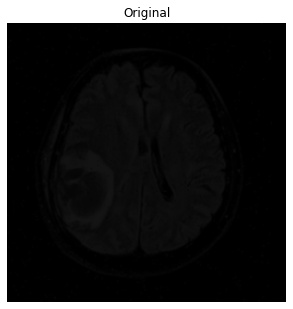

In [ ]:
image1 = cv2.imread(r'/content/Image1.png')
image1 = cv2.resize(image1, (256, 256))
brain_image = image1.copy()

print(type(brain_image))
print(brain_image.shape)
print(brain_image.dtype)
plt.figure(figsize=(5,14))
plt.imshow(brain_image)
plt.title('Original')
plt.axis('off')

## Log Transformation

In [ ]:
##Log transform
import math
def log_trans(img):
    height, width = img.shape[0:2]
    val = img.flatten()
    maxv = max(val)
    
    c = 255/(math.log(1 + maxv))
    
    for i in range(height):
        for j in range(width):

            new_val = int(c * (math.log( 1 + int(img[i][j]))))
            
            if new_val > 255:
              new_val = 255
            img[i][j] = new_val

    return img

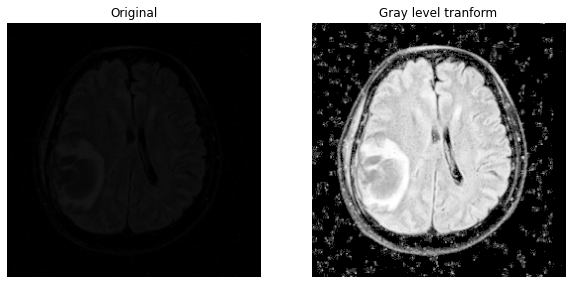

In [ ]:
brain_img = brain_image[:,:,0]
log_image = log_trans(brain_img.copy())
plot_img(image1, log_image, 'Original', 'Gray level tranform')

## Sharping

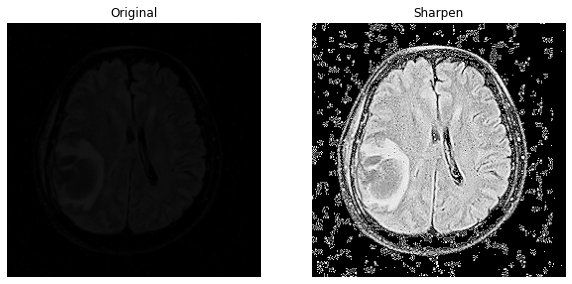

In [ ]:
## Sharping
kernel = np.array([[0, -1, 0],
                   [-1, 4.9, -1],
                   [0, -1, 0]])

image_sharp = cv2.filter2D(src = log_image, ddepth = -1, kernel = kernel)
plot_img(image1, image_sharp, 'Original', 'Sharpen')

# Image Enhancement Using increasing Contrast

(array([3.1571e+04, 1.0000e+01, 2.2000e+01, 1.4000e+01, 3.5000e+01,
        8.0000e+00, 6.8000e+01, 5.0100e+02, 8.0000e+00, 2.8000e+01,
        3.3000e+01, 5.0000e+00, 2.7000e+01, 1.9100e+02, 1.2000e+01,
        2.9000e+01, 1.6100e+02, 2.2000e+01, 2.7000e+01, 2.6000e+01,
        6.8200e+02, 8.0000e+00, 6.4000e+01, 1.1600e+02, 1.5000e+01,
        6.0000e+01, 5.3000e+01, 1.1900e+02, 3.3000e+01, 5.4000e+02,
        2.4000e+01, 3.7000e+01, 8.5000e+01, 9.3000e+01, 3.8000e+01,
        2.7000e+01, 2.7500e+02, 3.3000e+01, 6.3000e+01, 1.2200e+02,
        1.1500e+02, 9.5000e+01, 1.1700e+02, 1.1820e+03, 2.6000e+01,
        1.6000e+02, 1.1600e+02, 8.2000e+01, 7.7000e+01, 3.1400e+02,
        1.2900e+02, 6.3000e+01, 5.6900e+02, 1.1900e+02, 1.1100e+02,
        2.6100e+02, 2.8600e+02, 1.0700e+02, 4.6600e+02, 3.4800e+02,
        1.3600e+02, 6.1900e+02, 1.7700e+02, 3.2400e+02, 5.6400e+02,
        1.6470e+03, 3.1500e+02, 7.3500e+02, 5.5700e+02, 3.7100e+02,
        1.1900e+03, 4.7100e+02, 9.6100e+02, 4.92

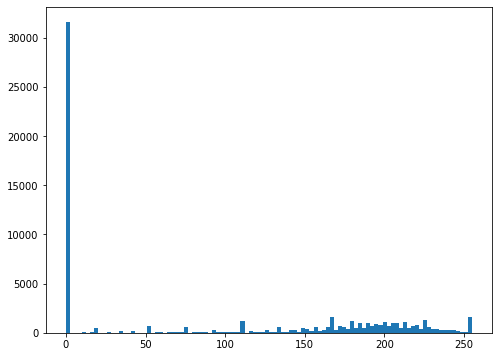

In [ ]:
img = np.asarray(image_sharp)

flat = img.flatten()

plt.figure(figsize=(8,6))
plt.hist(flat, bins=100)

In [ ]:
# PMF of all the pixels
def get_histogram(image, bins):
    
    histogram = np.zeros(bins, dtype=int)
    
    for pixel in image:
        histogram[pixel] += 1
    
    return histogram


hist = get_histogram(img, 256)

In [ ]:
def cumsum_func(histogram):
    cumsum = np.zeros(256, dtype=int)
    cumsum[0] = histogram[0]
    for i in range(1, histogram.size):
        cumsum[i] = cumsum[i-1] + histogram[i]
    return cumsum
    
cs = cumsum_func(hist)

In [ ]:
nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()

# re-normalize the cumsum
cs = nj / N

# back to uint8
# can't use floating point values in images
cs = cs.astype('uint8')

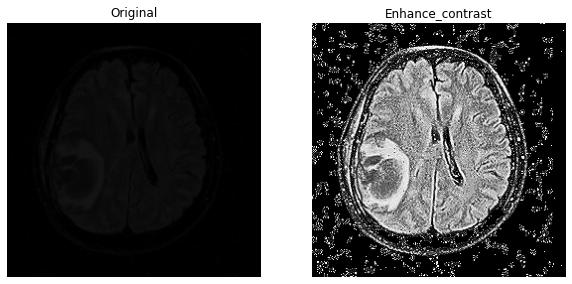

In [ ]:
img_new = cs[flat]
img_new = img_new.reshape(img.shape)
plot_img(image1, img_new.reshape(img.shape),'Original', 'Enhance_contrast')

(array([31728.,   524.,    78.,   251.,   217.,    91.,   663.,   226.,
          150.,    82.,   624.,   158.,   232.,   139.,   263.,    72.,
          114.,  1208.,   237.,   121.,   210.,   310.,   158.,   408.,
          108.,   341.,   108.,   286.,   147.,   242.,   382.,   227.,
          223.,   243.,   389.,   124.,   200.,   298.,   439.,   170.,
         1304.,   378.,     0.,   672.,   233.,   324.,   279.,   364.,
          428.,   490.,   471.,   159.,   407.,   395.,   208.,   284.,
          655.,   342.,   450.,   280.,   243.,   688.,     0.,   751.,
          627.,   103.,   398.,   290.,   653.,   446.,   396.,   322.,
          410.,   282.,   515.,   142.,   614.,   305.,   487.,   316.,
          376.,   397.,   349.,   323.,    81.,   299.,  1016.,   412.,
          160.,   248.,   407.,   254.,   276.,   133.,   239.,   143.,
          361.,   120.,   139.,  1501.]),
 array([  0.  ,   2.55,   5.1 ,   7.65,  10.2 ,  12.75,  15.3 ,  17.85,
         20.4 ,  22.95

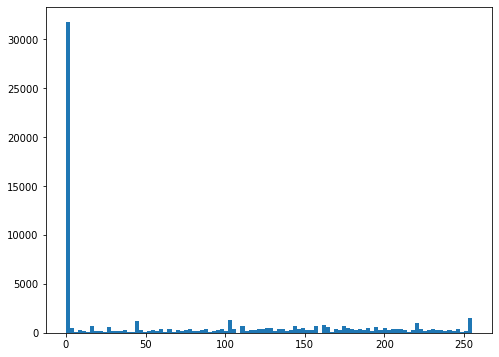

In [ ]:
img1 = np.asarray(img_new)

flat1 = img1.flatten()

plt.figure(figsize=(8,6))
plt.hist(flat1, bins=100)

# Image Enhancement Using Deep Learning

Work on this dataset:

https://www.kaggle.com/navoneel/brain-mri-images-for-brain-tumor-detection



In [ ]:
from keras.preprocessing import image
from keras.layers import add, Conv2D, Input, Reshape
import tensorflow as tf

In [ ]:
tf.config.list_physical_devices('GPU')
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
def apply_lowcontrast(image, intensity):
  hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) #convert it to hsv
  hsv[...,2] = hsv[...,2] * intensity
  return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

In [ ]:
def add_noise(image):
  noisy_image = image + 0.23 * np.random.randn(*image.shape)
  noisy_image = np.clip(noisy_image, 0, 1)
  return noisy_image

In [ ]:
def PreProcessData(ImagePath):
    X = []
    y = []
    for imageDir in list(os.listdir(ImagePath)):

        img = image.load_img(ImagePath + imageDir)
        img = image.img_to_array(img)
        img = img/255
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_y = cv2.resize(img, (256,256))

        intensity = np.random.randint(5, 90)/1000.0

        noised_img = add_noise(img_y)
        lowLightImg_x = apply_lowcontrast(img_y, intensity)

        X.append(lowLightImg_x)
        y.append(img_y)

    X1 = np.array(X)
    y1 = np.array(y)
    
    return X1,y1

In [ ]:
import os
path = '/content/my-drive/My Drive/MRI Brain/'
X_train , y_train = PreProcessData(path)

In [ ]:
Input_Sample = Input(shape=(256, 256, 3))
###-------------------------------------------------------------------------------------
model_1 = Conv2D(16,(3,3), activation='relu',padding='same',strides=1)(Input_Sample)
model_1 = Conv2D(32,(3,3), activation='relu',padding='same',strides=1)(model_1)
model_1 = Conv2D(64,(2,2), activation='relu',padding='same',strides=1)(model_1)
###-------------------------------------------------------------------------------------    
model_2 = Conv2D(32,(3,3), activation='relu',padding='same',strides=1)(Input_Sample)
model_2 = Conv2D(64,(2,2), activation='relu',padding='same',strides=1)(model_2)
###-------------------------------------------------------------------------------------    
model_2_1 = Conv2D(64,(2,2), activation='relu',padding='same',strides=1)(model_2)
#-------------------------------------###ADD###-----------------------------------------   
model_add_1 = add([model_1, model_2, model_2_1])

#------------------------------------#Extension#----------------------------------------    
model_3 = Conv2D(64,(3,3), activation='relu',padding='same',strides=1)(model_add_1)
model_3 = Conv2D(32,(3,3), activation='relu',padding='same',strides=1)(model_3)
model_3 = Conv2D(16,(2,2), activation='relu',padding='same',strides=1)(model_3)
###-------------------------------------------------------------------------------------    
model_3_1 = Conv2D(32,(3,3), activation='relu',padding='same',strides=1)(model_add_1)
model_3_1 = Conv2D(16,(2,2), activation='relu',padding='same',strides=1)(model_3_1)
###-------------------------------------------------------------------------------------    
model_3_2 = Conv2D(16,(2,2), activation='relu',padding='same',strides=1)(model_add_1)
#-------------------------------------###ADD###-----------------------------------------     
model_add_2 = add([model_3_1, model_3_2, model_3])

#------------------------------------#Extension#----------------------------------------    
model_4 = Conv2D(16,(3,3), activation='relu',padding='same',strides=1)(model_add_2)
###-------------------------------------------------------------------------------------
model_4_1 = Conv2D(16,(3,3), activation='relu',padding='same',strides=1)(model_add_1)
#-------------------------------------###ADD###----------------------------------------- 
model_add_3 = add([model_4_1, model_add_2, model_4])

#------------------------------------#Extension#----------------------------------------    
model_5 = Conv2D(16,(3,3), activation='relu',padding='same',strides=1)(model_add_3)
model_5 = Conv2D(16,(2,2), activation='relu',padding='same',strides=1)(model_add_3)

model_5 = Conv2D(3,(3,3), activation='relu',padding='same',strides=1)(model_5) 


In [ ]:
from keras.models import Model

Model_Enhancer = Model(inputs=Input_Sample, outputs=model_5)

In [ ]:
Model_Enhancer.compile(optimizer = 'adam', loss='mean_squared_error')
Model_Enhancer.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_3 (Conv2D)              (None, 256, 256, 32  896         ['input_1[0][0]']                
                                )                                                             

<div dir="rtl">
<font face="XB Zar" size=5>
    <h1>
    </h1>
epoch * steps_per_epoch < number of images in dataset
</font>
</div>

In [ ]:
def GenerateInputs(X, y):
    for i in range(len(X)):
        X_input = X[i].reshape(1, 256, 256, 3)
        y_input = y[i].reshape(1, 256, 256, 3)
        yield (X_input,y_input)

history = Model_Enhancer.fit(GenerateInputs(X_train, y_train), epochs=25, verbose=1, steps_per_epoch = 10, shuffle=True)

Epoch 1/25
10/10 [==============================] - 32s 84ms/step - loss: 0.0356
Epoch 2/25
10/10 [==============================] - 1s 83ms/step - loss: 0.0315
Epoch 3/25
10/10 [==============================] - 1s 83ms/step - loss: 0.0206
Epoch 4/25
10/10 [==============================] - 1s 83ms/step - loss: 0.0441
Epoch 5/25
10/10 [==============================] - 1s 83ms/step - loss: 0.0279
Epoch 6/25
10/10 [==============================] - 1s 84ms/step - loss: 0.0297
Epoch 7/25
10/10 [==============================] - 1s 83ms/step - loss: 0.0636
Epoch 8/25
10/10 [==============================] - 1s 83ms/step - loss: 0.0210
Epoch 9/25
10/10 [==============================] - 1s 83ms/step - loss: 0.0202
Epoch 10/25
10/10 [==============================] - 1s 83ms/step - loss: 0.0193
Epoch 11/25
10/10 [==============================] - 1s 83ms/step - loss: 0.0274
Epoch 12/25
10/10 [==============================] - 1s 83ms/step - loss: 0.0209
Epoch 13/25
10/10 [=================

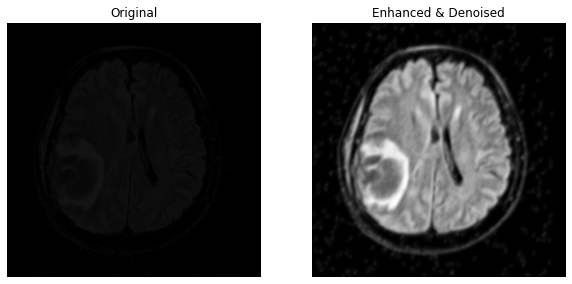

In [ ]:
brain_image1 = brain_image.copy()
Prediction = Model_Enhancer.predict(brain_image1.reshape(1, 256, 256, 3))
Prediction = Prediction.reshape(256,256,3)
brain_image1[:,:,:] = Prediction[:,:,:]
plot_img(brain_image, brain_image1[:,:,0], 'Original', 'Enhanced & Denoised')

# Denoising image using Median Filter

Enter the size of filter: 1


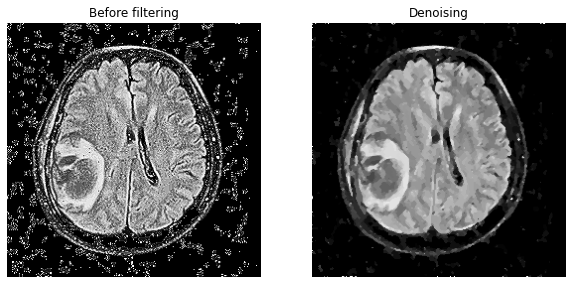

In [ ]:
def median_filter(img, size):
    r_img = img.copy()
    height, width = r_img.shape[0:2]
    for row in range(size, height-size):
        for column in range(size, width-size):
            r_img[row][column] = np.median(r_img[row - size : row + (size+1), column - size : column + (size+1)])
            
    return r_img

size = int(input("Enter the size of filter: "))
r_img = median_filter(img_new, size)

plot_img(img_new, r_img, 'Before filtering', 'Denoising')

# Denoising using Autoencoder

In [ ]:
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input
from tensorflow.keras.optimizers import SGD, Adam
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/my-drive')

Drive already mounted at /content/my-drive; to attempt to forcibly remount, call drive.mount("/content/my-drive", force_remount=True).


In [ ]:
import os
train_images=sorted(os.listdir('my-drive/My Drive/MRI Brain')) #Taking a list of the images' name then sorting 

In [ ]:
from keras.preprocessing import image

# Read images from the dataset and add
# Normalize images and turn to list of arrays

train_image=[]
for im in train_images:
  img=image.load_img('my-drive/My Drive/MRI Brain/'+im, target_size=(256,256),color_mode='grayscale')
  img=image.img_to_array(img)
  img=img/255
  train_image.append(img)

train_df=np.array(train_image)

In [ ]:
#Subplotting 5 images
def plot_image(dataset):
  f,ax=plt.subplots(1,5)
  f.set_size_inches(30,10)
  for i in range(5,10):
    ax[i-5].imshow(dataset[i].reshape(256,256), cmap='gray')
    ax[i-5].axis('off')
  plt.show()

In [ ]:
#Adding random noise
def add_noise(image):
  noisy_image = image + 0.24 * np.random.randn(*image.shape)
  noisy_image = np.clip(noisy_image, 0, 1)
  return noisy_image

In [ ]:
# Add noise to each image
noised_df=[]
for img in train_df:
  noisy=add_noise(img)
  noised_df.append(noisy)

noised_df=np.array(noised_df)

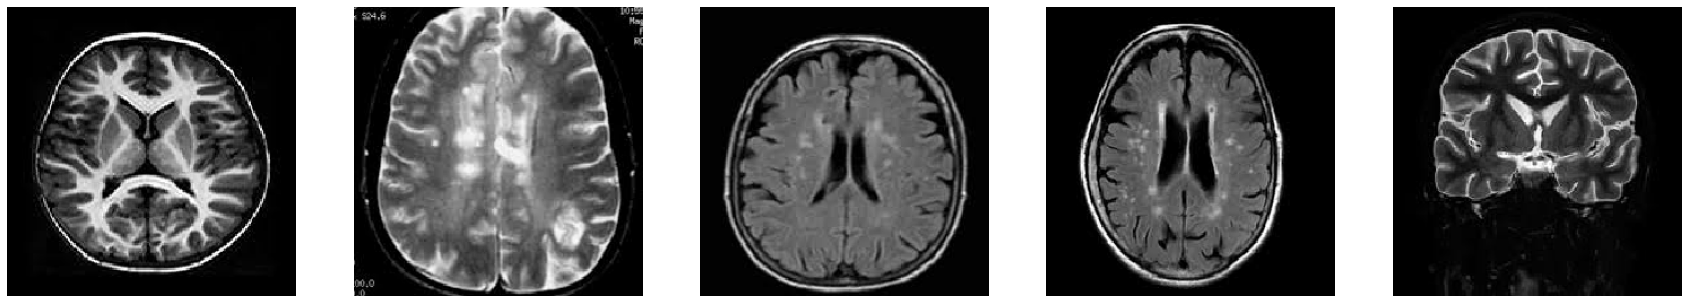

In [ ]:
plot_image(train_df)

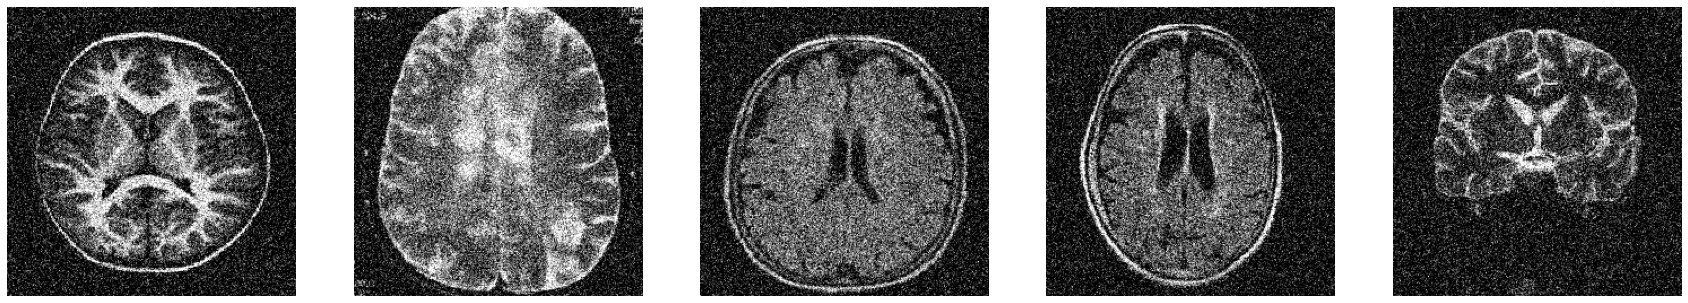

In [ ]:
plot_image(noised_df)

In [ ]:
xnoised = noised_df[:121] # X train --> Noisy images for training
xtestnoised = noised_df[121:] # X test --> Noisy images for validation and test
xtrain = train_df[:121] # y train --> without noise
xtest = train_df[121:] # y test --> without noise

In [ ]:
input = Input(shape=(256,256,1))
#enoder 
x = Conv2D(64, (3,3), activation='relu', padding='same')(input)
x1 = MaxPooling2D((2,2), padding='same')(x)
x2 = Conv2D(64, (3,3), activation='relu', padding='same')(x1)
x3 = MaxPooling2D((2,2), padding='same')(x2)
   
#decoder
x4 = Conv2D(64, (3,3), activation='relu', padding='same')(x3)
x5 = UpSampling2D((2,2))(x4)
x6 = Conv2D(64, (3,3), activation='relu', padding='same')(x5)
x7 = UpSampling2D((2,2))(x6)
x8 = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x7)
   
#model
autoencoder = Model(inputs=input, outputs=x8)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 conv2d_27 (Conv2D)          (None, 256, 256, 64)      640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 conv2d_28 (Conv2D)          (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_29 (Conv2D)          (None, 64, 64, 64)        3692

In [ ]:
autoencoder.fit(xnoised, 
                xtrain, 
                epochs=20, 
                batch_size=10, 
                validation_data=(xtestnoised, xtest))

Epoch 1/20
13/13 [==============================] - 3s 190ms/step - loss: 0.6117 - val_loss: 0.5252
Epoch 2/20
13/13 [==============================] - 2s 168ms/step - loss: 0.4579 - val_loss: 0.4544
Epoch 3/20
13/13 [==============================] - 2s 166ms/step - loss: 0.4385 - val_loss: 0.4395
Epoch 4/20
13/13 [==============================] - 2s 167ms/step - loss: 0.4209 - val_loss: 0.4269
Epoch 5/20
13/13 [==============================] - 2s 166ms/step - loss: 0.4093 - val_loss: 0.4180
Epoch 6/20
13/13 [==============================] - 2s 166ms/step - loss: 0.4042 - val_loss: 0.4162
Epoch 7/20
13/13 [==============================] - 2s 167ms/step - loss: 0.4020 - val_loss: 0.4143
Epoch 8/20
13/13 [==============================] - 2s 167ms/step - loss: 0.3998 - val_loss: 0.4129
Epoch 9/20
13/13 [==============================] - 2s 167ms/step - loss: 0.3990 - val_loss: 0.4120
Epoch 10/20
13/13 [==============================] - 2s 166ms/step - loss: 0.3979 - val_loss: 0.4120

In [ ]:
dtest = []
for images in xtestnoised[8:18]:
  dtest.append(images)

# Normalizing my own image test and add it to the testing images list
img1=image.img_to_array(img_new)
img1=img1/255
dtest.append(img1)
dtest_arr = np.array(dtest)

pred= autoencoder.predict(dtest_arr)

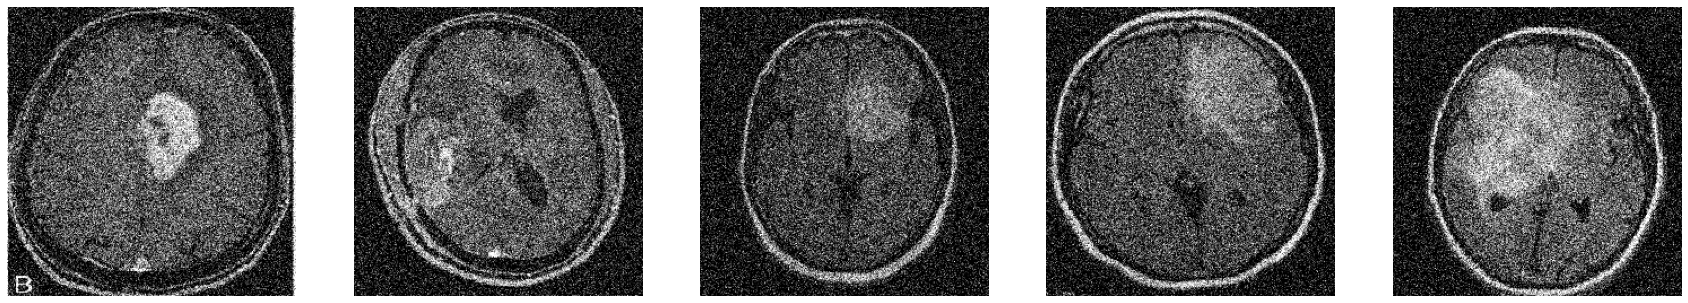

In [ ]:
plot_image(dtest_arr) #Plotting 5 first images before denoising

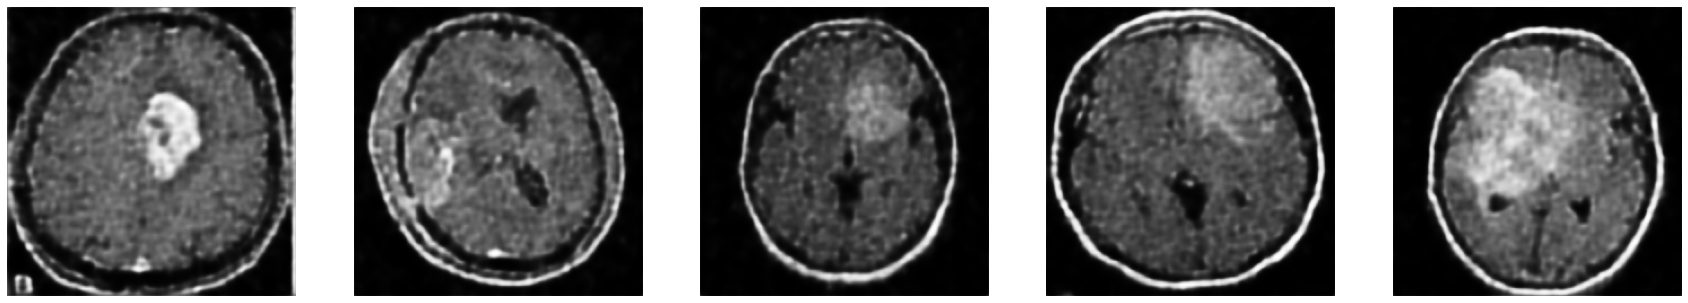

In [ ]:
plot_image(pred) #Plotting after denoising

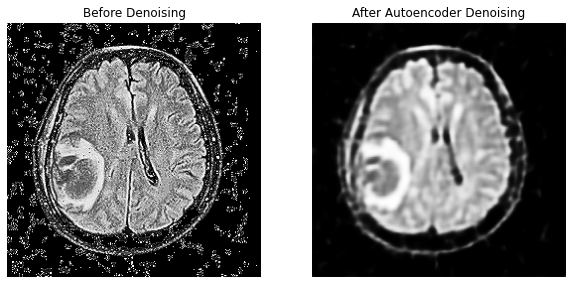

In [ ]:
plot_img(img_new, pred[10].reshape(256,256), 'Before Denoising', 'After Autoencoder Denoising')

# Edge Detection Using Highpass filtering

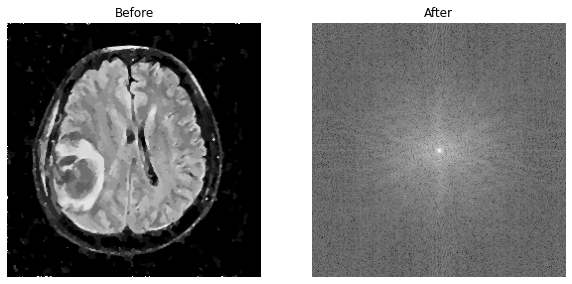

In [ ]:
### Fourier Transform --> Real and Imaginary value

F1 = np.fft.fft2(r_img)
F2 = np.fft.fftshift(F1) # Zero frequency in the center of the image
mag = 20 * np.log(np.abs(F2) + 1e-6) #Saving the complex numbers as real numbers

plot_img(r_img, mag, 'Before', 'After')

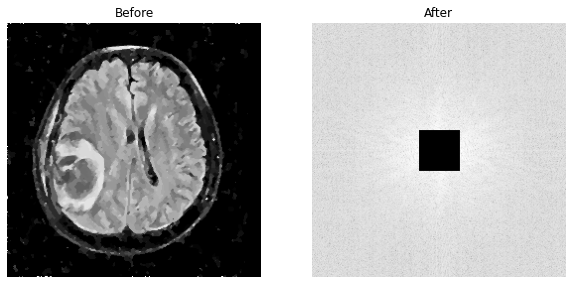

In [ ]:
(w, h) = r_img.shape
half_w, half_h = np.int32(w/2), np.int32(h/2)

#### highpass filter
n = 20 # The higher the number, the higher scales of the image therefore the details are much less shown

F2[ half_w-n:half_w+n+1 , half_h-n:half_h+n+1 ] = 0 # select all but the first 40x40 (low) frequencies

mag1 = 20 * np.log(np.abs(F2) + 1e-6)

plot_img(r_img, mag1, 'Before', 'After')

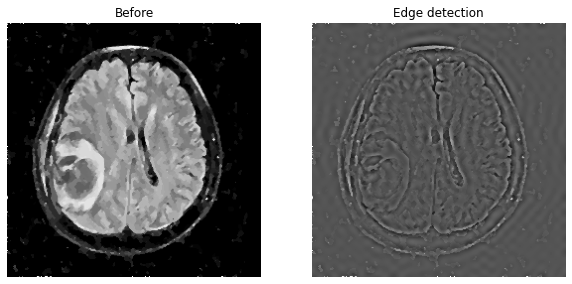

In [ ]:
mag2 = np.fft.ifft2(np.fft.ifftshift(F2)) # Inverse Fourier Transform
mag2 = np.real(mag2) #Taking only the real values
plot_img(r_img, mag2, 'Before', 'Edge detection')

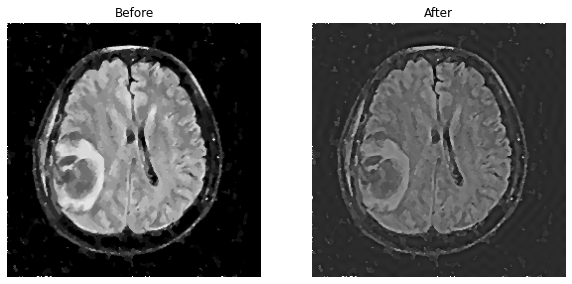

In [ ]:
plot_img(r_img, r_img+mag2, 'Before', 'After')